In [4]:
import numpy as np
import pandas as pd
data=pd.read_csv('seattle-weather.csv')
data.head(20)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [5]:
data.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [6]:
data.shape

(1461, 6)

In [7]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [9]:
import itertools
import matplotlib.pyplot as plt
import re
import scipy
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

Weather Encoding: {'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4}


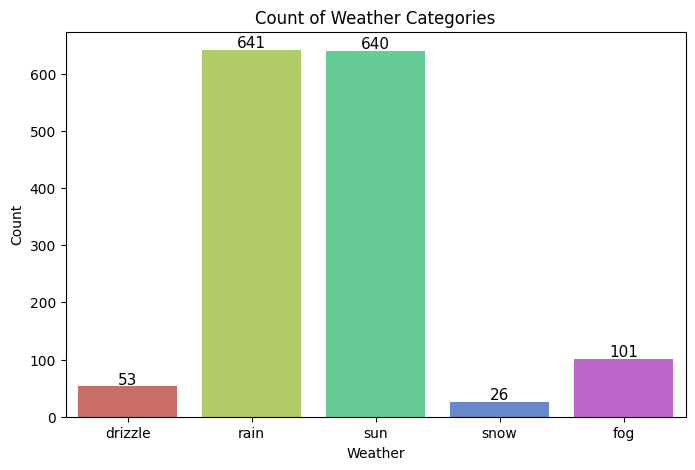

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['weather_encoded'] = le.fit_transform(data['weather'])
weather_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Weather Encoding:", weather_mapping)
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='weather', hue='weather', palette='hls', legend=False)
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
        textcoords='offset points'
    )

plt.title("Count of Weather Categories")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.show()

In [12]:
weather_counts = data['weather'].value_counts()

In [13]:
for weather, count in weather_counts.items():
    percent = (count / len(data)) * 100
    print(f"Percent of {weather.capitalize()}: {percent:.2f}%")

Percent of Rain: 43.87%
Percent of Sun: 43.81%
Percent of Fog: 6.91%
Percent of Drizzle: 3.63%
Percent of Snow: 1.78%


In [14]:
data[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [15]:
features = ['precipitation', 'temp_min', 'wind', 'weather_encoded']
target = 'temp_max'

X = data[features]
y = data[target]

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f" R2 Score: {r2:.2f}")

 R2 Score: 0.83


In [20]:
accuracy=model.score(X_train,y_train)

In [21]:
print(accuracy)

0.8156769241978279


In [23]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Manual RMSE
r2 = r2_score(y_test, y_pred)

print(f"\n✅ Random Forest Accuracy:")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📈 R² Score: {r2:.2f}")


✅ Random Forest Accuracy:
📉 RMSE: 3.04
📈 R² Score: 0.84


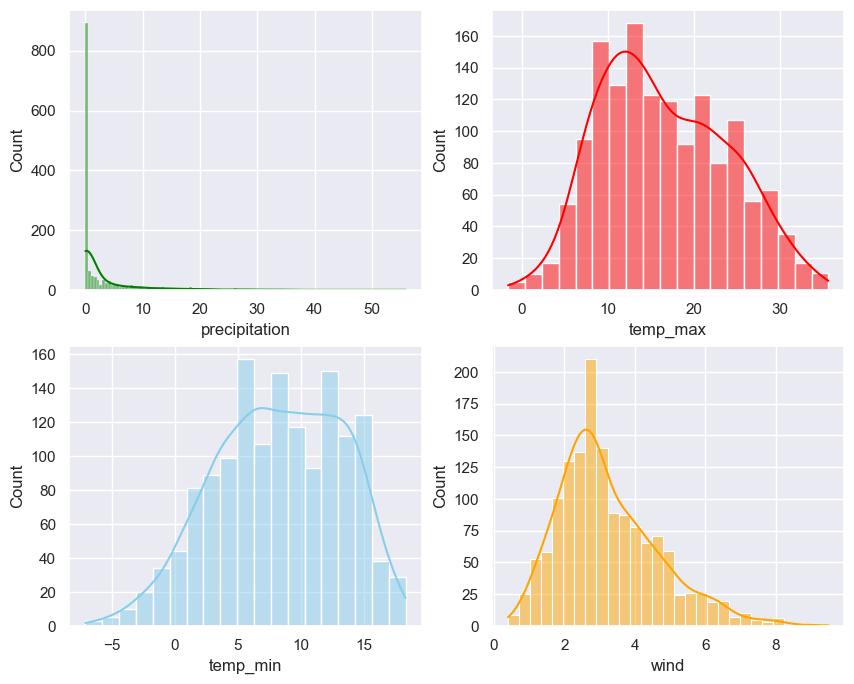

In [31]:
sns.set(style="darkgrid")
variables = ["precipitation", "temp_max", "temp_min", "wind"]
colors = ["green", "red", "skyblue", "orange"]
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, var in enumerate(variables):
    sns.histplot(data=data, x=var, kde=True, ax=axs[i//2, i%2], color=colors[i])

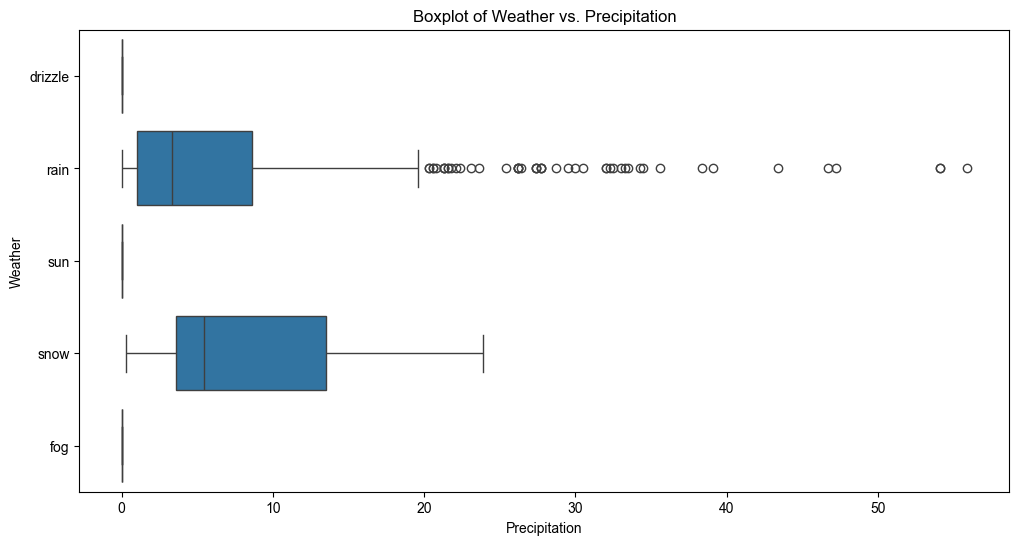

In [33]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="precipitation", y="weather", data=data, ax=ax)
    ax.set(xlabel='Precipitation', ylabel='Weather', title='Boxplot of Weather vs. Precipitation')

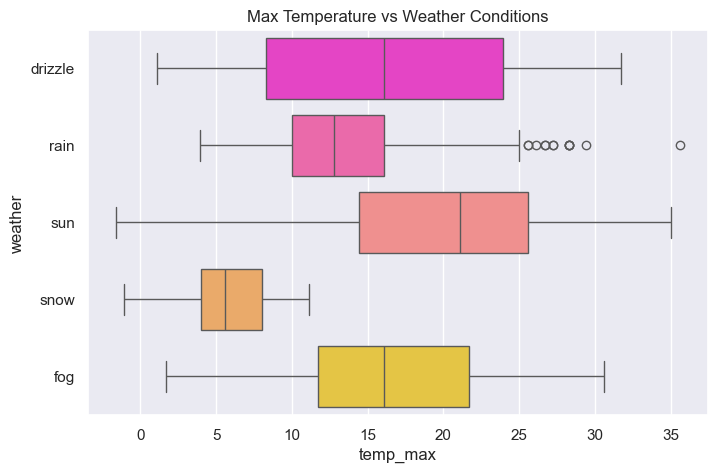

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(
    x="temp_max",
    y="weather",
    data=data,
    hue="weather",
    palette="spring",
    legend=False,
    ax=ax
)
plt.title("Max Temperature vs Weather Conditions")
plt.show()


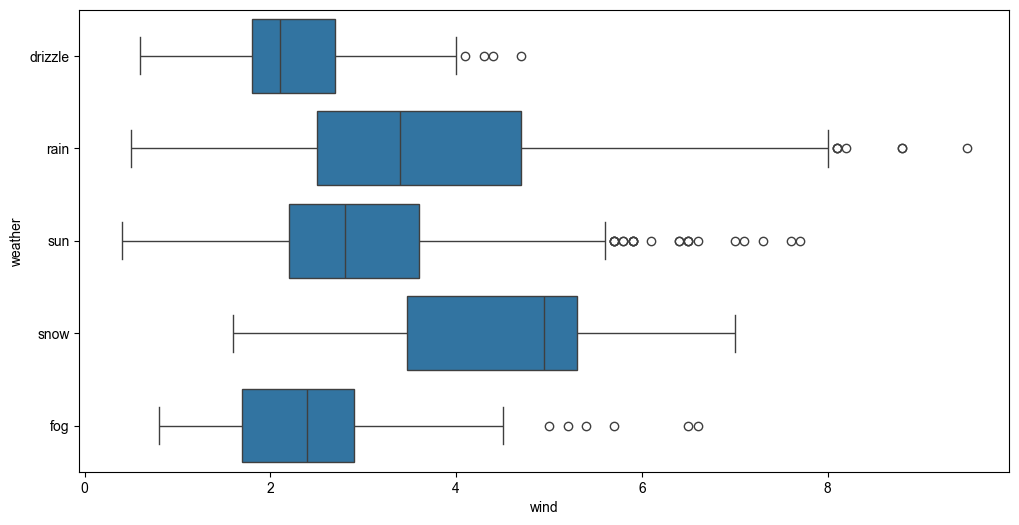

In [37]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="wind", y="weather", data=data, ax=ax)

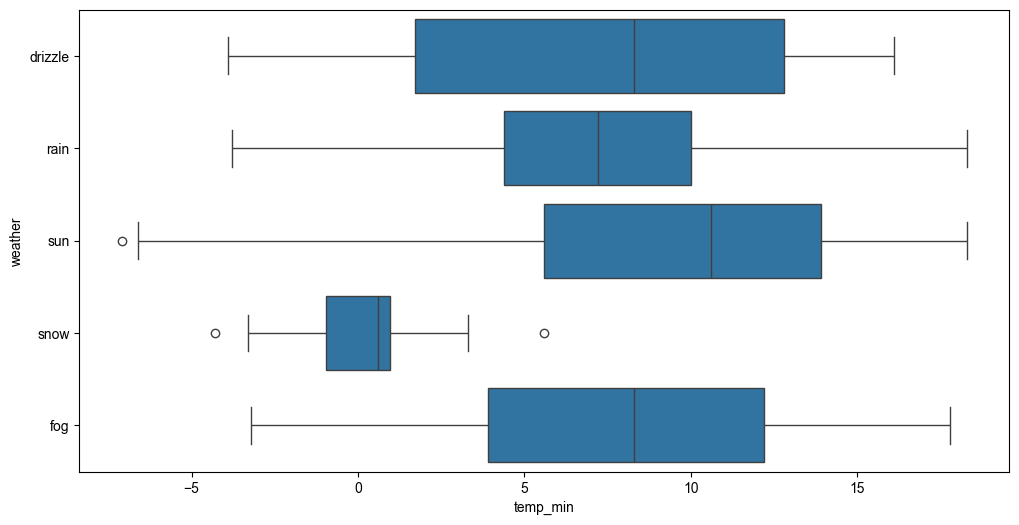

In [39]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_min", y="weather", data=data, ax=ax)

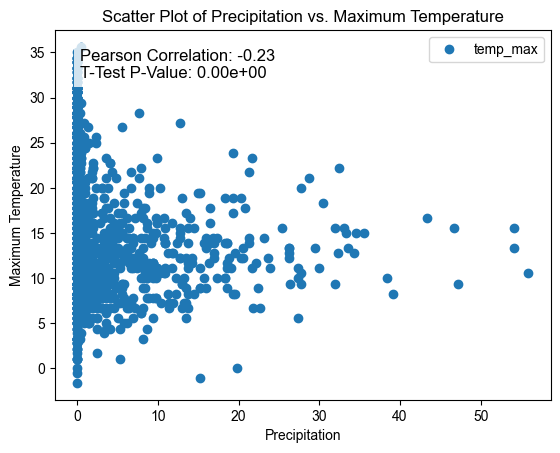

In [40]:
corr = data["precipitation"].corr(data["temp_max"])
ttest, pvalue = stats.ttest_ind(data["precipitation"],data["temp_max"])
with plt.style.context('default'):
    ax = data.plot("precipitation", "temp_max", style='o')
    ax.set_title('Scatter Plot of Precipitation vs. Maximum Temperature')
    ax.set_xlabel('Precipitation')
    ax.set_ylabel('Maximum Temperature')
    textstr = f'Pearson Correlation: {corr:.2f}\nT-Test P-Value: {pvalue:.2e}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

[Text(0.5, 1.0, 'Scatter plot of Wind vs. Maximum Temperature')]

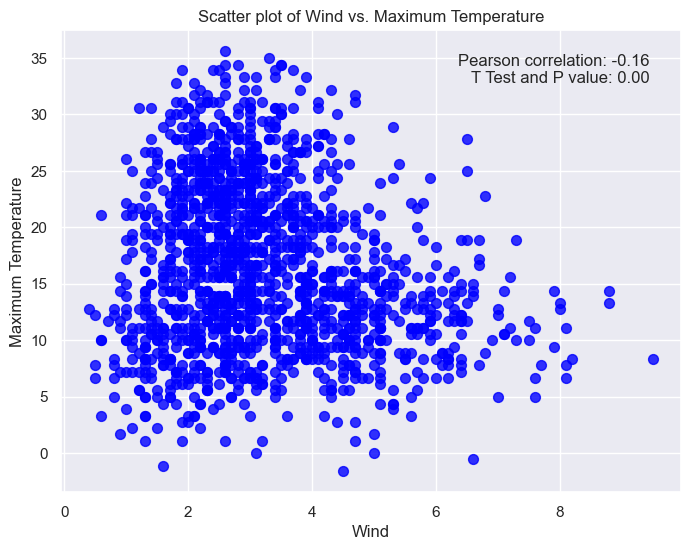

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=data["wind"], y=data["temp_max"], marker='o', s=50, alpha=0.8, color='blue')
corr, p_value = np.corrcoef(data["wind"], data["temp_max"])[0, 1], np.mean(np.abs(stats.ttest_ind(data["wind"], data["temp_max"])[1]))
ax.text(0.95, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)
ax.set(xlabel='Wind', ylabel='Maximum Temperature')
ax.set(title='Scatter plot of Wind vs. Maximum Temperature')

[Text(0.5, 1.0, 'Scatter plot of Maximum vs. Minimum Temperature')]

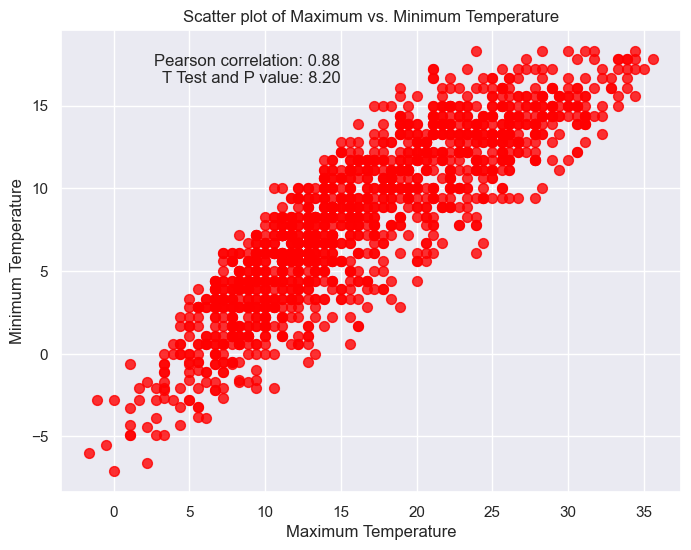

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=data["temp_max"], y=data["temp_min"], marker='o', s=50, alpha=0.8, color='red')
corr, p_value = np.corrcoef(data["temp_max"], data["temp_min"])[0, 1], np.mean(np.abs(np.subtract(data["temp_max"], data["temp_min"])))
ax.text(0.45, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)
ax.set(xlabel='Maximum Temperature', ylabel='Minimum Temperature')
ax.set(title='Scatter plot of Maximum vs. Minimum Temperature')

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("seattle-weather.csv")
df.dropna(inplace=True)
le = LabelEncoder()
df['weather_encoded'] = le.fit_transform(df['weather'])
feature_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
X = df[feature_cols]
y = df['weather_encoded']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
input_data = {
    'precipitation': 5.3,
    'temp_max': 1.1,
    'temp_min': -3.3,
    'wind': 3.2
}
input_df = pd.DataFrame([input_data])
input_scaled = scaler.transform(input_df)
probs = model.predict_proba(input_scaled)[0]
predicted_class = model.predict(input_scaled)[0]
predicted_label = le.inverse_transform([predicted_class])[0]
predicted_class = model.predict(input_scaled)[0]
predicted_label = le.inverse_transform([predicted_class])[0]
print("✅ Predicted Weather Condition:", predicted_label)
print("\n📊 Probabilities (in %):")
for class_index, prob in enumerate(probs):
    label = le.inverse_transform([class_index])[0]
    print(f" - {label}: {prob * 100:.2f}%")


✅ Predicted Weather Condition: snow

📊 Probabilities (in %):
 - drizzle: 0.00%
 - fog: 0.00%
 - rain: 6.50%
 - snow: 92.00%
 - sun: 1.50%


In [66]:
import joblib

# Save the trained RandomForest model
joblib.dump(model, 'model.pkl')

# Save the fitted StandardScaler
joblib.dump(scaler, 'scaler.pkl')

# Save the fitted LabelEncoder
joblib.dump(le, 'label_encoder.pkl')

print("✅ Model, scaler, and label encoder saved successfully!")


✅ Model, scaler, and label encoder saved successfully!
